In [9]:
import numpy as np
import pandas as pd

grocery = pd.read_csv("Groceries_dataset.csv")
marketing = pd.read_csv("DirectMarketing.csv")

In [25]:
import matplotlib.pyplot as plt

In [19]:
grocery.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [33]:
items = grocery[['Date','itemDescription']]\
.groupby('Date').count().reset_index()

items.rename(columns = {'itemDescription' : 'itemCount'}, inplace = True)

items.head()

,Date,itemCount
0,01-01-2014,48
1,01-01-2015,48
2,01-02-2014,62
3,01-02-2015,61
4,01-03-2014,54


Text(0, 0.5, 'Item Count')

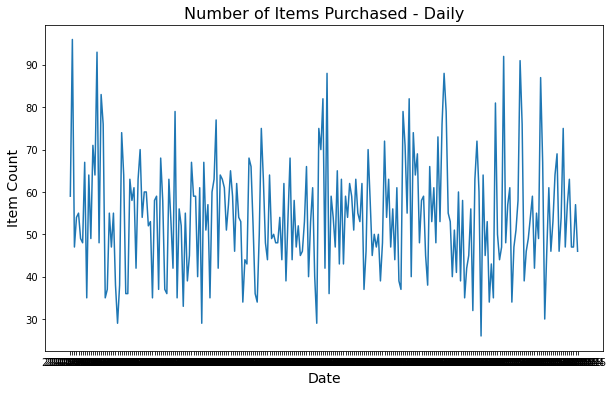

In [34]:
plt.figure(figsize=(10,6))
plt.title("Number of Items Purchased - Daily", fontsize=16)
plt.plot('Date', 'itemCount', data=items[items.Date > '2015-08-01'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Item Count', fontsize=14)

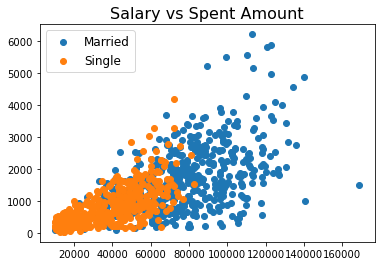

In [40]:
fix, ax = plt.subplots()
plt.title("Salary vs Spent Amount", fontsize=16)

ax.scatter('Salary', 'AmountSpent', data = marketing[marketing.Married == 'Married'])

ax.scatter('Salary', 'AmountSpent', data = marketing[marketing.Married == 'Single'])

ax.legend(labels=['Married','Single'], loc='upper left', fontsize=12)

(array([ 89., 125., 120.,  94.,  94.,  72.,  55.,  65.,  56.,  43.,  33.,
         28.,  25.,  26.,  17.,  16.,   8.,   9.,   7.,   2.,   3.,   3.,
          0.,   1.,   0.,   2.,   2.,   0.,   2.,   1.,   1.,   1.]),
 array([  38.     ,  231.09375,  424.1875 ,  617.28125,  810.375  ,
        1003.46875, 1196.5625 , 1389.65625, 1582.75   , 1775.84375,
        1968.9375 , 2162.03125, 2355.125  , 2548.21875, 2741.3125 ,
        2934.40625, 3127.5    , 3320.59375, 3513.6875 , 3706.78125,
        3899.875  , 4092.96875, 4286.0625 , 4479.15625, 4672.25   ,
        4865.34375, 5058.4375 , 5251.53125, 5444.625  , 5637.71875,
        5830.8125 , 6023.90625, 6217.     ]),
 <a list of 32 Patch objects>)

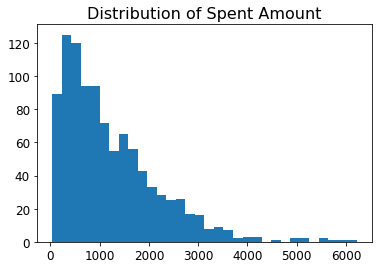

In [42]:
plt.title("Distribution of Spent Amount", fontsize=16)
plt.hist('AmountSpent', data=marketing, bins=32)

{'whiskers': [<matplotlib.lines.Line2D at 0x22b2176de48>,
 'caps': [<matplotlib.lines.Line2D at 0x22b2177f588>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b2176db00>,
 'medians': [<matplotlib.lines.Line2D at 0x22b2177fc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x22b21789048>,
 'means': []}

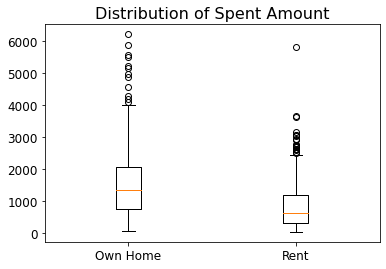

In [45]:
x1 = marketing[marketing.OwnHome == 'Own']['AmountSpent']
x2 = marketing[marketing.OwnHome == 'Rent']['AmountSpent']

plt.title("Distribution of Spent Amount", fontsize=16)
plt.boxplot((x1, x2), labels = ['Own Home', 'Rent'])

KeyError: 'location'

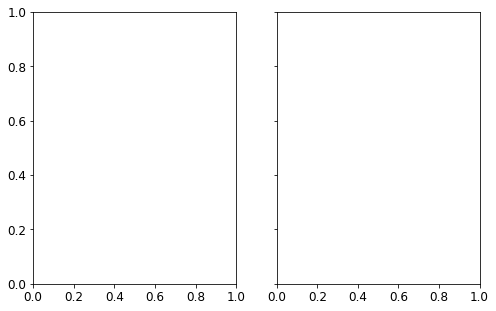

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,5))

ax1.bar(x=location.index, height=location.values, width=0.5)
ax1.set_title("Location", fontsize=14)
ax2.bar(x=age.index, height=age.values, width=0.5)
ax2.set_title("Age Groups", fontsize=14)

(array([[ 0., 37., 12.,  4.,  2.,  2.,  2.,  1.,  1.,  0.],
        [ 0., 41., 42., 13.,  7.,  8.,  4.,  4.,  4.,  3.],
        [ 0., 17., 35., 24., 17., 11.,  5.,  5.,  5.,  3.],
        [ 0.,  2., 10.,  6., 16., 24., 11.,  9.,  8.,  8.],
        [ 0.,  0.,  5.,  7., 10., 22., 21.,  9.,  5.,  5.],
        [ 0.,  0.,  0.,  5.,  9., 10., 17.,  6., 11.,  6.],
        [ 0.,  0.,  0.,  0.,  7., 11.,  6., 10., 10.,  1.],
        [ 0.,  0.,  0.,  0.,  4.,  4., 11., 13., 11.,  9.],
        [ 0.,  0.,  0.,  0.,  2.,  8.,  9.,  8.,  5.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  6.,  5., 10.]]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 array([    0.,  8000., 16000., 24000., 32000., 40000., 48000., 56000.,
        64000., 72000., 80000.]),
 <matplotlib.collections.QuadMesh at 0x22b21848080>)

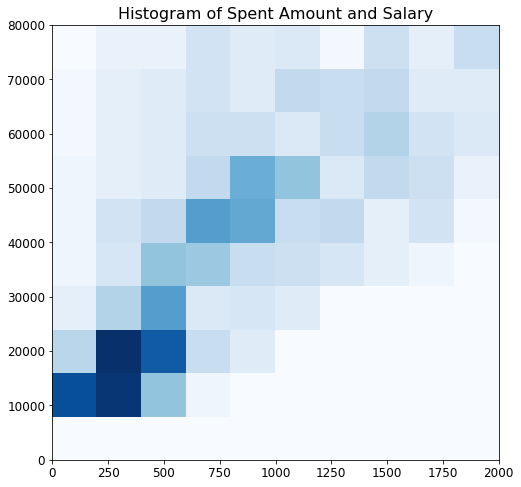

In [50]:
plt.figure(figsize=(8, 8))
plt.title("Histogram of Spent Amount and Salary", fontsize=16)

plt.hist2d("AmountSpent", "Salary", range = [[0,2000], [0, 80000]], data = marketing, cmap = 'Blues')